<a href="https://colab.research.google.com/github/3lonco/ColabNotebooks/blob/main/KmeansFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#https://www.sejuku.net/blog/64365

#libraryのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [11]:
iris = datasets.load_iris()
df = pd.DataFrame(
    iris.data, #
    columns = iris.feature_names 
)
df["label"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
input_data = df.iloc[:,:-1].values # インスタンス属性valuesにアクセスすると、np.arrayが取得できます。

In [13]:
input_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
def kmeans(k,X,max_iter=300):
  X_size,n_features=X.shape #X_sizeはデータ数,n_featuresは得領量の数

  #ランダムに重心の初期値を初期化
  centroids = X[np.random.choice(X_size,k)]

  #前の重心と比較するために、仮に新しい重心を入れておく配列を用意
  new_centroids = np.zeros((k,n_features))

  # Array to save the information of clusters on each data
  cluster = np.zeros(X_size)

  #iterate until the limitation
  for epoch in range(max_iter):
    #iter for all input data
    for i in range(X_size):
      
      #Calculate the dasitance from data to the each center
      distances = np.sum((centroids - X[i])** 2,axis=1)

      #Renew the cluster into the one which is the closest distance 
      cluster[i] = np.argsort(distances)[0]

    #Recalculate the center point in all clusters
    for j in range(k):
      new_centroids[j] = X[cluster==j].mean(axis=0)
    
    if np.sum(new_centroids == centroids) == k:
      print("break")
      break
    centroids = new_centroids
  return cluster



  




In [17]:
cluster = kmeans(3,input_data)

Text(0.5, 1.0, 'true label')

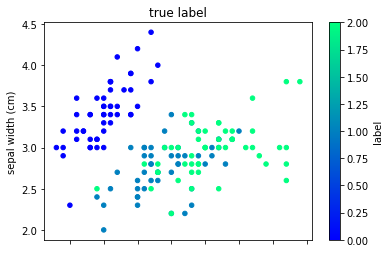

In [18]:
df["cluster"] = cluster
 
df.plot(kind="scatter", x=0,y=1,c="label", cmap="winter") # cmapで散布図の色を変えられます。
plt.title("true label")